### Regression Tasks:
1. **Deep Neural Network (DNN)** for house price prediction
2. **Gradient Boosting Regressor** (optional model) for house price prediction

### Dataset:
- **Name**: California Housing Dataset
- **Link**: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
- **Size**: 20,640 samples

---

## 1. Import Required Libraries

In [ ]:
# Install required packages (uncomment if needed)
# !pip install tensorflow scikit-learn pandas numpy matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

print(f"TensorFlow Version: {tf.__version__}")
print("All libraries imported successfully!")

TensorFlow Version: 2.19.0
All libraries imported successfully!


---
## 2. Load and Explore Dataset

### Dataset Information:
- **Dataset Name**: California Housing Dataset
- **Dataset Link**: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
- **Number of Samples (Rows)**: 20,640
- **Number of Features (Columns)**: 8
- **Target Variable**: MedHouseVal (Median house value in $100,000s)
- **Description**: This dataset was derived from the 1990 U.S. census. Each row represents a census block group in California. The target variable is the median house value for households within a block.
- **Purpose**: Regression task to predict median house prices

In [ ]:
# Load California Housing Dataset
import os
from sklearn.datasets import fetch_california_housing

try:
    housing = fetch_california_housing()
    X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
    y_housing = pd.Series(housing.target, name='MedHouseVal')
    print("Dataset successfully loaded from sklearn repository.")
except Exception as e:
    print(f"Note: Failed to fetch from sklearn ({e}). Loading from local Colab sample_data instead.")

    # Fallback: Load from local Colab sample_data
    train_path = '/content/sample_data/california_housing_train.csv'
    test_path = '/content/sample_data/california_housing_test.csv'

    if os.path.exists(train_path) and os.path.exists(test_path):
        # Load and combine train/test files to recreate full dataset
        train_df = pd.read_csv(train_path)
        test_df = pd.read_csv(test_path)
        df = pd.concat([train_df, test_df], ignore_index=True)

        # Reconstruct features to match sklearn's format
        # Sklearn features: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
        X_housing = pd.DataFrame()
        X_housing['MedInc'] = df['median_income']
        X_housing['HouseAge'] = df['housing_median_age']
        X_housing['AveRooms'] = df['total_rooms'] / df['households']
        X_housing['AveBedrms'] = df['total_bedrooms'] / df['households']
        X_housing['Population'] = df['population']
        X_housing['AveOccup'] = df['population'] / df['households']
        X_housing['Latitude'] = df['latitude']
        X_housing['Longitude'] = df['longitude']

        # Target: MedHouseVal (in $100,000s)
        y_housing = pd.Series(df['median_house_value'] / 100000.0, name='MedHouseVal')
        print("Dataset successfully loaded from local sample_data.")
    else:
        raise RuntimeError("Could not load dataset from sklearn or local sample_data.")

print("=" * 70)
print("CALIFORNIA HOUSING DATASET INFORMATION")
print("=" * 70)
print(f"Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html")
print(f"Number of Samples (Rows): {X_housing.shape[0]}")
print(f"Number of Features (Columns): {X_housing.shape[1]}")
print(f"Target Variable: MedHouseVal (Median House Value in $100,000s)")
print("=" * 70)

Note: Failed to fetch from sklearn (HTTP Error 403: Forbidden). Loading from local Colab sample_data instead.
Dataset successfully loaded from local sample_data.
CALIFORNIA HOUSING DATASET INFORMATION
Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
Number of Samples (Rows): 20000
Number of Features (Columns): 8
Target Variable: MedHouseVal (Median House Value in $100,000s)


In [ ]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
X_housing.head()


First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.4936,15.0,11.889831,2.718220,1015.0,2.150424,34.19,-114.31
1,1.8200,19.0,16.522678,4.105832,1129.0,2.438445,34.40,-114.47
2,1.6509,17.0,6.153846,1.487179,333.0,2.846154,33.69,-114.56
3,3.1917,14.0,6.641593,1.491150,515.0,2.278761,33.64,-114.57
4,1.9250,20.0,5.549618,1.244275,624.0,2.381679,33.57,-114.57


In [ ]:
# Feature Descriptions (First 20 features as required - we have 8)
print("\nFeature Descriptions:")
print("=" * 70)
feature_descriptions = {
    'MedInc': 'Median income in block group (in tens of thousands of dollars)',
    'HouseAge': 'Median house age in block group (in years)',
    'AveRooms': 'Average number of rooms per household',
    'AveBedrms': 'Average number of bedrooms per household',
    'Population': 'Block group population (number of people)',
    'AveOccup': 'Average number of household members (occupancy)',
    'Latitude': 'Block group latitude coordinate',
    'Longitude': 'Block group longitude coordinate'
}

for i, (feat, desc) in enumerate(feature_descriptions.items(), 1):
    print(f"{i}. {feat}: {desc}")

print(f"\nTarget Variable: MedHouseVal - Median house value for California districts (in $100,000s)")


Feature Descriptions:
1. MedInc: Median income in block group (in tens of thousands of dollars)
2. HouseAge: Median house age in block group (in years)
3. AveRooms: Average number of rooms per household
4. AveBedrms: Average number of bedrooms per household
5. Population: Block group population (number of people)
6. AveOccup: Average number of household members (occupancy)
7. Latitude: Block group latitude coordinate
8. Longitude: Block group longitude coordinate

Target Variable: MedHouseVal - Median house value for California districts (in $100,000s)


In [ ]:
# Dataset Statistics
print("\nDataset Statistics:")
X_housing.describe()


Dataset Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.872132,28.627750,5.434171,1.097416,1425.557650,2.985177,35.626750,-119.566172
std,1.900356,12.582229,2.501635,0.480563,1131.048487,4.072019,2.136141,2.003609
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.562500,18.000000,4.441216,1.005913,788.000000,2.430380,33.930000,-121.790000
50%,3.536000,29.000000,5.232838,1.048710,1166.000000,2.819566,34.250000,-118.490000
75%,4.745325,37.000000,6.056697,1.099664,1724.000000,3.283609,37.710000,-118.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,502.461538,41.950000,-114.310000


In [ ]:
# Target Variable Statistics
print("\nTarget Variable (MedHouseVal) Statistics:")
print(f"Min:    ${y_housing.min() * 100000:,.0f}")
print(f"Max:    ${y_housing.max() * 100000:,.0f}")
print(f"Mean:   ${y_housing.mean() * 100000:,.0f}")
print(f"Median: ${y_housing.median() * 100000:,.0f}")
print(f"Std:    ${y_housing.std() * 100000:,.0f}")


Target Variable (MedHouseVal) Statistics:
Min:    $14,999
Max:    $500,001
Mean:   $207,083
Median: $179,800
Std:    $115,557


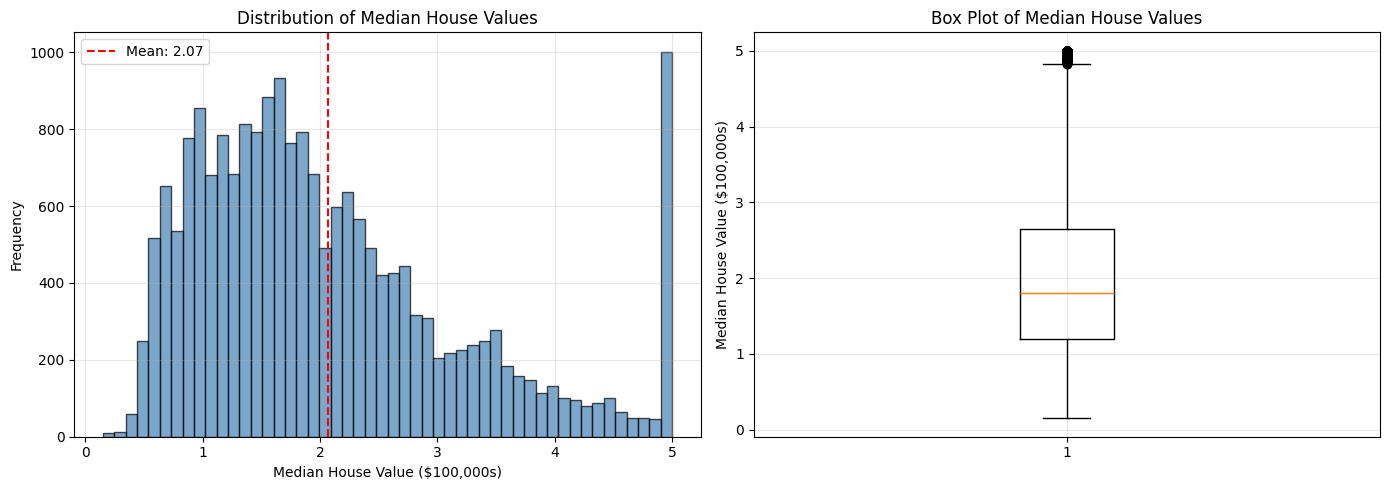

In [ ]:
# Visualize Target Variable Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(y_housing, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Median House Value ($100,000s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Median House Values')
axes[0].axvline(y_housing.mean(), color='red', linestyle='--', label=f'Mean: {y_housing.mean():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box Plot
axes[1].boxplot(y_housing, vert=True)
axes[1].set_ylabel('Median House Value ($100,000s)')
axes[1].set_title('Box Plot of Median House Values')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

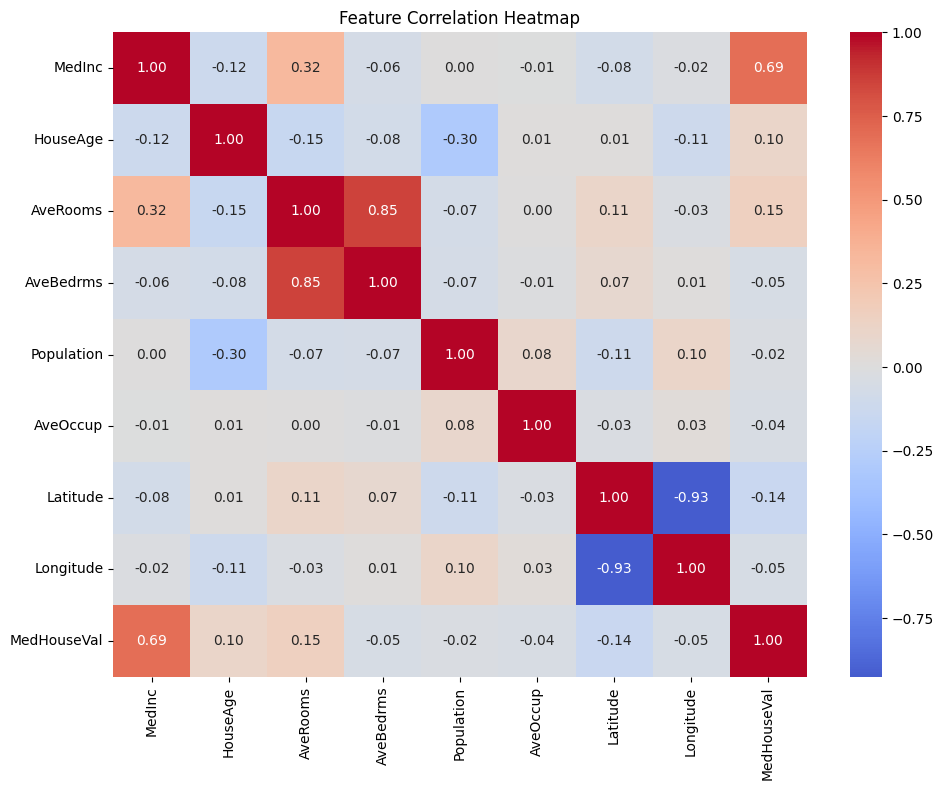

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
data_with_target = X_housing.copy()
data_with_target['MedHouseVal'] = y_housing
correlation_matrix = data_with_target.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

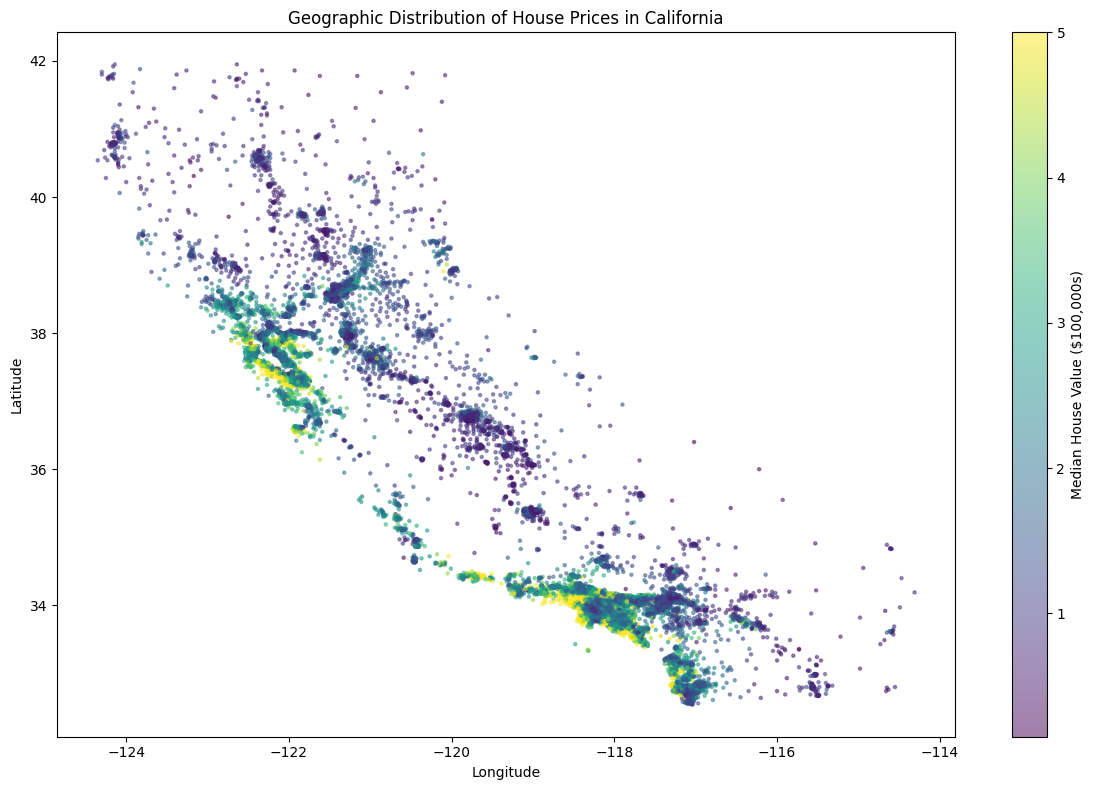

In [ ]:
# Geographic Distribution of House Prices
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_housing['Longitude'], X_housing['Latitude'],
                      c=y_housing, cmap='viridis', alpha=0.5, s=5)
plt.colorbar(scatter, label='Median House Value ($100,000s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of House Prices in California')
plt.tight_layout()
plt.show()

---
## 3. Data Preprocessing

In [ ]:
# Check for missing values
print("Missing Values:")
print(X_housing.isnull().sum())
print(f"\nTotal missing values: {X_housing.isnull().sum().sum()}")

Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Total missing values: 0


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 16000
Test set size: 4000


In [ ]:
# Feature Scaling (Optimization Technique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied using StandardScaler")
print(f"\nScaled features shape: {X_train_scaled.shape}")
print(f"Scaled features mean (should be ~0): {X_train_scaled.mean(axis=0).round(2)}")
print(f"Scaled features std (should be ~1): {X_train_scaled.std(axis=0).round(2)}")

Feature scaling applied using StandardScaler

Scaled features shape: (16000, 8)
Scaled features mean (should be ~0): [ 0.  0. -0. -0.  0. -0. -0.  0.]
Scaled features std (should be ~1): [1. 1. 1. 1. 1. 1. 1. 1.]


---
## 4. Function to Evaluate Regression Models

In [ ]:
def evaluate_regression(y_true, y_pred, model_name):
    """
    Evaluate regression model and return metrics.

    Metrics:
    - MSE: Mean Squared Error
    - RMSE: Root Mean Squared Error
    - R2 Score: Coefficient of Determination
    - MAPE: Mean Absolute Percentage Error
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'MAPE (%)': mape
    }

---
## 5. Model 1: Deep Neural Network (DNN) for Regression

In [ ]:
# Build Deep Neural Network for Regression
def build_dnn_regressor(input_shape):
    """
    Build a Deep Neural Network for regression.

    Architecture:
    - Input Layer: 8 features
    - Hidden Layer 1: 256 neurons, ReLU, BatchNorm, Dropout(0.3)
    - Hidden Layer 2: 128 neurons, ReLU, BatchNorm, Dropout(0.3)
    - Hidden Layer 3: 64 neurons, ReLU, BatchNorm, Dropout(0.2)
    - Hidden Layer 4: 32 neurons, ReLU, BatchNorm
    - Output Layer: 1 neuron (regression output)
    """
    model = models.Sequential([
        # Input layer
        layers.InputLayer(input_shape=(input_shape,)),

        # Hidden Layer 1
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),  # Optimization Technique 1
        layers.Dropout(0.3),          # Optimization Technique 2

        # Hidden Layer 2
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Hidden Layer 3
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        # Hidden Layer 4
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),

        # Output Layer (linear activation for regression)
        layers.Dense(1)
    ])

    return model

# Build the model
dnn_regressor = build_dnn_regressor(X_train_scaled.shape[1])
dnn_regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,489 (185.50 KB)

 Trainable params: 46,529 (181.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Compile the DNN model
dnn_regressor.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for optimization (Optimization Techniques 3 & 4)
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )
]

print("DNN Model compiled successfully!")
print("\nOptimization Techniques Applied:")
print("1. Batch Normalization (after each dense layer)")
print("2. Dropout Regularization (0.3, 0.3, 0.2)")
print("3. Early Stopping (patience=15, restore_best_weights=True)")
print("4. Learning Rate Reduction on Plateau (factor=0.5, patience=7)")
print("5. Feature Scaling with StandardScaler")

DNN Model compiled successfully!

Optimization Techniques Applied:
1. Batch Normalization (after each dense layer)
2. Dropout Regularization (0.3, 0.3, 0.2)
3. Early Stopping (patience=15, restore_best_weights=True)
4. Learning Rate Reduction on Plateau (factor=0.5, patience=7)
5. Feature Scaling with StandardScaler


In [ ]:
# Train the DNN Model
print("Training Deep Neural Network...")
print("This may take a few minutes...\n")

history = dnn_regressor.fit(
    X_train_scaled, y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

print("\nDNN training completed!")

Training Deep Neural Network...
This may take a few minutes...

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4.4024 - mae: 1.7596 - val_loss: 1.3245 - val_mae: 0.8248 - learning_rate: 0.0010
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7411 - mae: 0.6369 - val_loss: 0.5028 - val_mae: 0.4914 - learning_rate: 0.0010
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5442 - mae: 0.5431 - val_loss: 0.3764 - val_mae: 0.4252 - learning_rate: 0.0010
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4751 - mae: 0.5063 - val_loss: 0.3502 - val_mae: 0.4181 - learning_rate: 0.0010
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4510 - mae: 0.4966 - val_loss: 0.3349 - val_mae: 0.4001 - learning_rate: 0.0010
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4149 - mae: 0.4683 - val_loss: 0.3503 - val_mae: 0.4106 - learning_rate: 0.0010
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4351 - mae: 0.

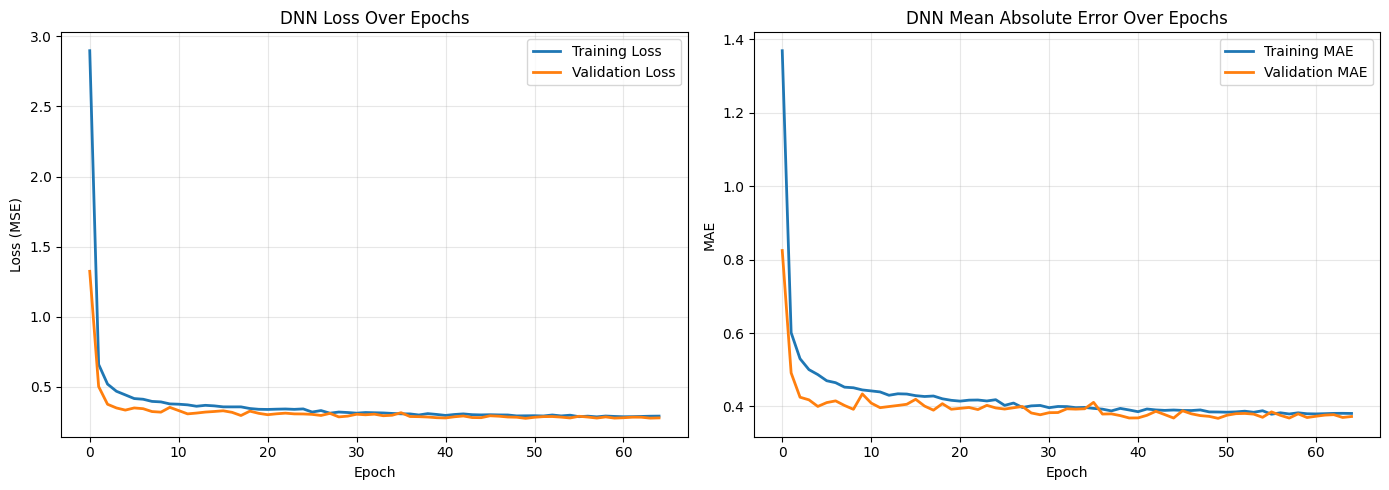

In [ ]:
# Plot DNN Training History
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('DNN Loss Over Epochs', fontsize=12)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('DNN Mean Absolute Error Over Epochs', fontsize=12)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate DNN on Test Set
print("Evaluating DNN on Test Set...")

y_pred_dnn = dnn_regressor.predict(X_test_scaled, verbose=0).flatten()
dnn_results = evaluate_regression(y_test, y_pred_dnn, 'Deep Neural Network')

print("\n" + "=" * 60)
print("DEEP NEURAL NETWORK RESULTS")
print("=" * 60)
for metric, value in dnn_results.items():
    if metric != 'Model':
        print(f"{metric}: {value:.4f}")
print("=" * 60)

Evaluating DNN on Test Set...

DEEP NEURAL NETWORK RESULTS
MSE: 0.2770
RMSE: 0.5263
R2 Score: 0.7983
MAPE (%): 21.3372


---
## 6. Model 2: Gradient Boosting Regressor (Optional Model)

In [ ]:
# Build and Train Gradient Boosting Regressor
print("=" * 60)
print("Training Gradient Boosting Regressor...")
print("=" * 60)

gb_regressor = GradientBoostingRegressor(
    n_estimators=200,        # Number of boosting stages
    max_depth=5,             # Maximum depth of individual trees
    learning_rate=0.1,       # Learning rate (shrinkage)
    subsample=0.8,           # Fraction of samples for fitting trees
    min_samples_split=5,     # Minimum samples to split a node
    min_samples_leaf=2,      # Minimum samples in leaf node
    random_state=42,
    verbose=1
)

gb_regressor.fit(X_train_scaled, y_train)

print("\nOptimization Techniques Applied:")
print("1. n_estimators=200 (number of boosting iterations)")
print("2. learning_rate=0.1 (step size shrinkage)")
print("3. max_depth=5 (prevents overfitting)")
print("4. subsample=0.8 (stochastic gradient boosting)")
print("5. min_samples_split=5, min_samples_leaf=2 (regularization)")
print("\nTraining completed!")

Training Gradient Boosting Regressor...
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1721           0.1509           20.61s
         2           1.0386           0.1371           19.19s
         3           0.9325           0.1222           19.11s
         4           0.8252           0.0332           18.75s
         5           0.7516           0.0909           18.71s
         6           0.6919           0.0874           18.28s
         7           0.6314           0.0311           18.05s
         8           0.5893           0.0543           18.04s
         9           0.5410           0.0181           18.01s
        10           0.5194           0.0802           18.56s
        20           0.3417           0.0204           17.76s
        30           0.2708           0.0251           16.64s
        40           0.2432           0.0251           16.90s
        50           0.2187           0.0065           16.68s
        60           0.2053  

In [ ]:
# Evaluate Gradient Boosting on Test Set
print("Evaluating Gradient Boosting on Test Set...")

y_pred_gb = gb_regressor.predict(X_test_scaled)
gb_results = evaluate_regression(y_test, y_pred_gb, 'Gradient Boosting')

print("\n" + "=" * 60)
print("GRADIENT BOOSTING RESULTS")
print("=" * 60)
for metric, value in gb_results.items():
    if metric != 'Model':
        print(f"{metric}: {value:.4f}")
print("=" * 60)

Evaluating Gradient Boosting on Test Set...

GRADIENT BOOSTING RESULTS
MSE: 0.2172
RMSE: 0.4661
R2 Score: 0.8418
MAPE (%): 17.4502


---
## 7. Model Comparison and Results Summary

In [ ]:
# Summary of Regression Results
results_df = pd.DataFrame([dnn_results, gb_results])

print("\n" + "=" * 80)
print("REGRESSION RESULTS SUMMARY - CALIFORNIA HOUSING DATASET")
print("=" * 80)
print(results_df.to_string(index=False))
print("=" * 80)


REGRESSION RESULTS SUMMARY - CALIFORNIA HOUSING DATASET
              Model      MSE     RMSE  R2 Score  MAPE (%)
Deep Neural Network 0.277002 0.526310  0.798259 21.337215
  Gradient Boosting 0.217244 0.466095  0.841781 17.450164


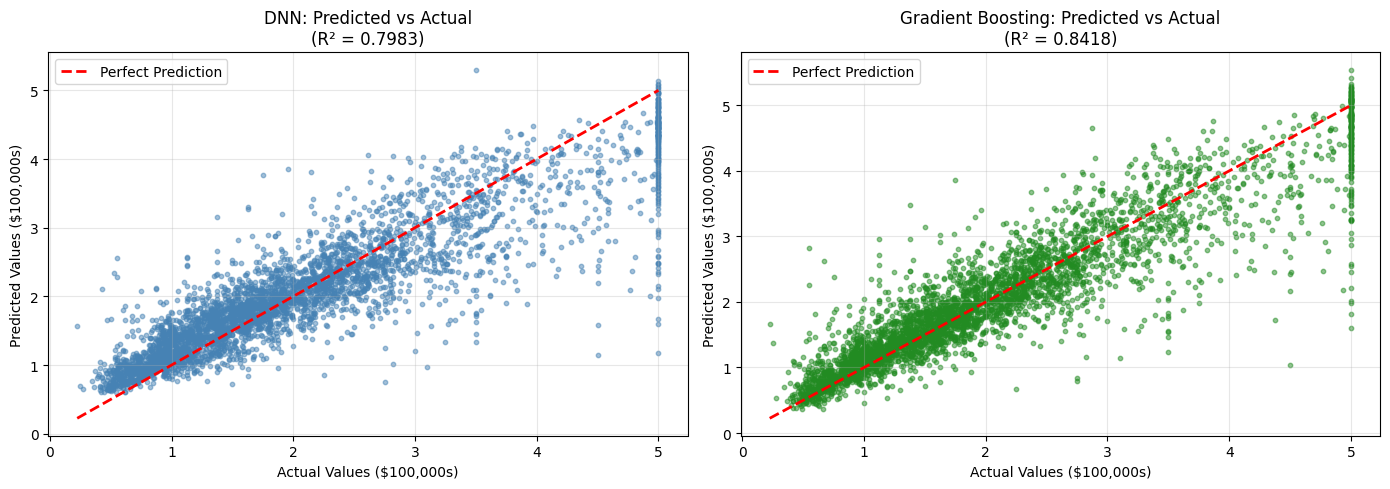

In [ ]:
# Visualization: Predicted vs Actual Values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# DNN: Predicted vs Actual
axes[0].scatter(y_test, y_pred_dnn, alpha=0.5, s=10, color='steelblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values ($100,000s)')
axes[0].set_ylabel('Predicted Values ($100,000s)')
axes[0].set_title(f'DNN: Predicted vs Actual\n(R² = {dnn_results["R2 Score"]:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gradient Boosting: Predicted vs Actual
axes[1].scatter(y_test, y_pred_gb, alpha=0.5, s=10, color='forestgreen')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values ($100,000s)')
axes[1].set_ylabel('Predicted Values ($100,000s)')
axes[1].set_title(f'Gradient Boosting: Predicted vs Actual\n(R² = {gb_results["R2 Score"]:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

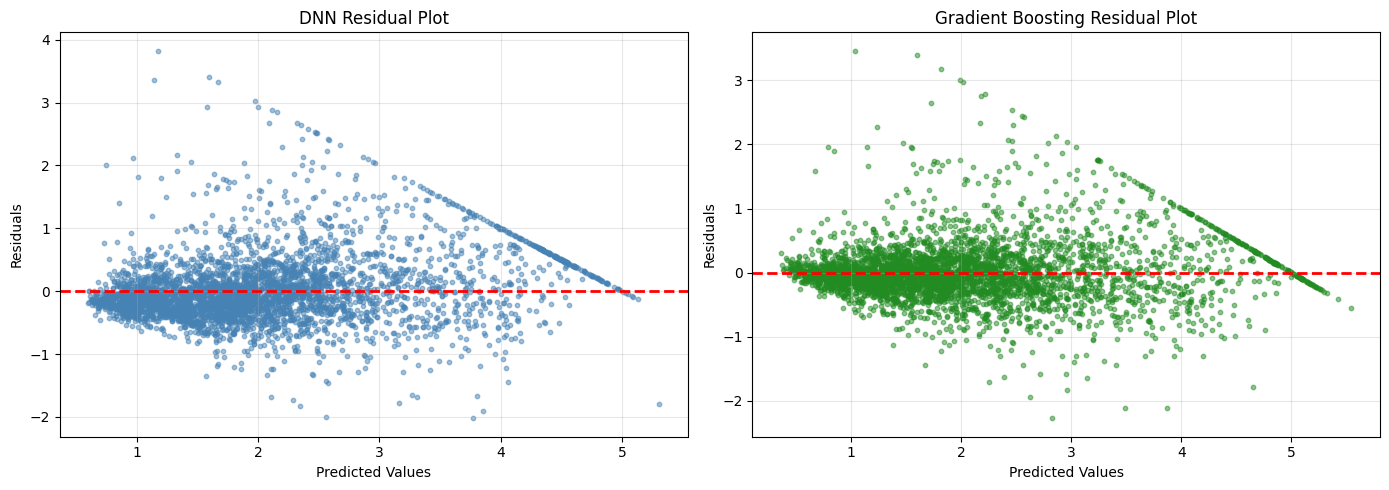

In [ ]:
# Residual Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# DNN Residuals
residuals_dnn = y_test - y_pred_dnn
axes[0].scatter(y_pred_dnn, residuals_dnn, alpha=0.5, s=10, color='steelblue')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('DNN Residual Plot')
axes[0].grid(True, alpha=0.3)

# Gradient Boosting Residuals
residuals_gb = y_test - y_pred_gb
axes[1].scatter(y_pred_gb, residuals_gb, alpha=0.5, s=10, color='forestgreen')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Gradient Boosting Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

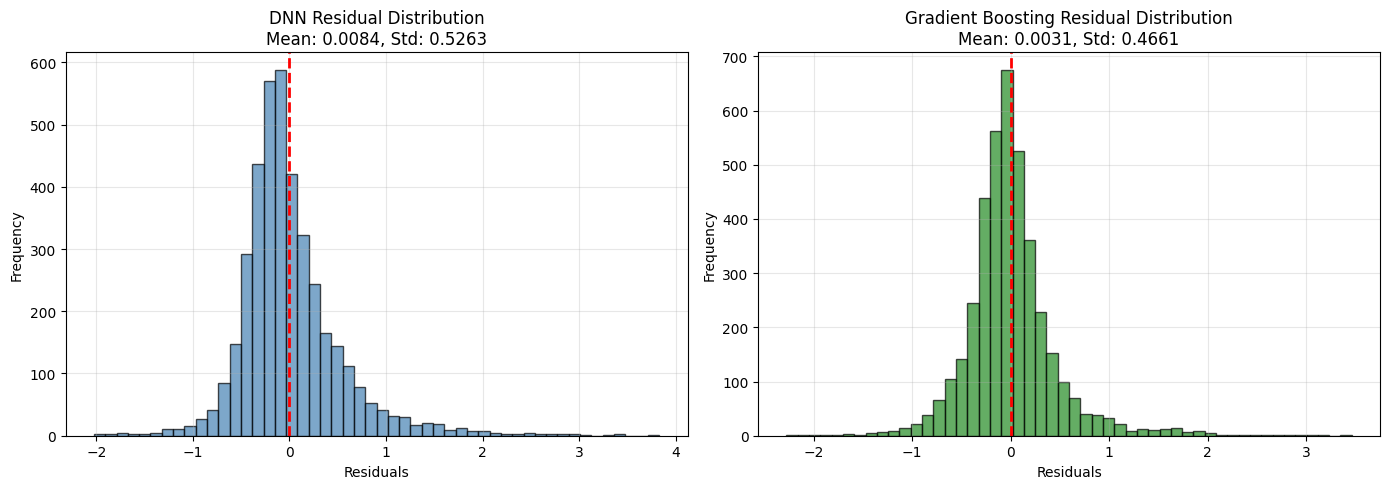

In [ ]:
# Residual Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# DNN Residual Distribution
axes[0].hist(residuals_dnn, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'DNN Residual Distribution\nMean: {residuals_dnn.mean():.4f}, Std: {residuals_dnn.std():.4f}')
axes[0].grid(True, alpha=0.3)

# Gradient Boosting Residual Distribution
axes[1].hist(residuals_gb, bins=50, color='forestgreen', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Gradient Boosting Residual Distribution\nMean: {residuals_gb.mean():.4f}, Std: {residuals_gb.std():.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

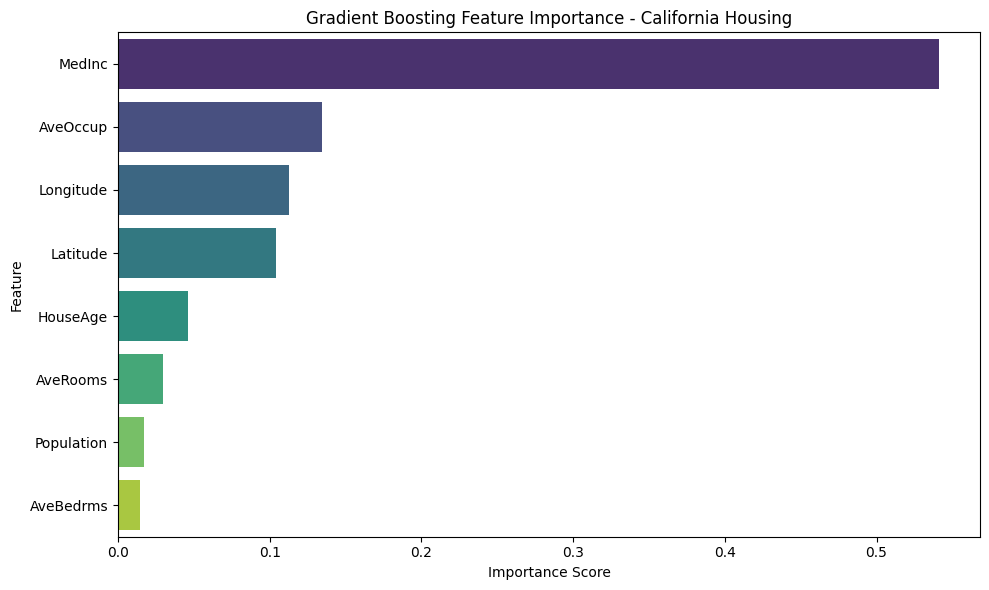


Feature Importance Ranking:
  MedInc: 0.5411
  AveOccup: 0.1347
  Longitude: 0.1127
  Latitude: 0.1040
  HouseAge: 0.0459
  AveRooms: 0.0299
  Population: 0.0169
  AveBedrms: 0.0147


In [ ]:
# Feature Importance (Gradient Boosting)
feature_importance = pd.DataFrame({
    'Feature': X_housing.columns,
    'Importance': gb_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Gradient Boosting Feature Importance - California Housing')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
for i, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

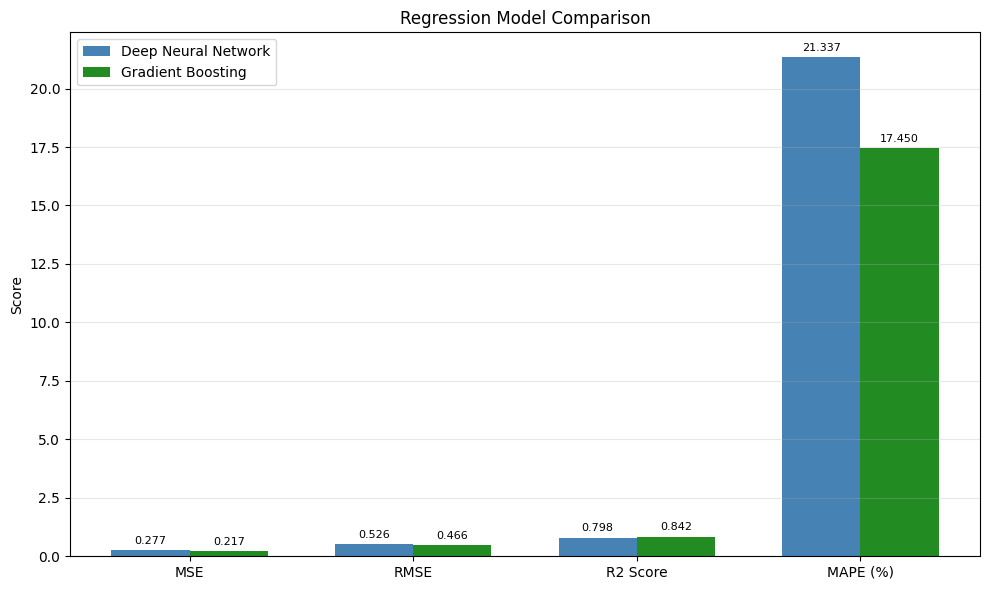

In [ ]:
# Model Comparison Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['MSE', 'RMSE', 'R2 Score', 'MAPE (%)']
x = np.arange(len(metrics))
width = 0.35

dnn_values = [dnn_results['MSE'], dnn_results['RMSE'], dnn_results['R2 Score'], dnn_results['MAPE (%)']]
gb_values = [gb_results['MSE'], gb_results['RMSE'], gb_results['R2 Score'], gb_results['MAPE (%)']]

bars1 = ax.bar(x - width/2, dnn_values, width, label='Deep Neural Network', color='steelblue')
bars2 = ax.bar(x + width/2, gb_values, width, label='Gradient Boosting', color='forestgreen')

ax.set_ylabel('Score')
ax.set_title('Regression Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

---
# FINAL SUMMARY - TASK 2B: REGRESSION

In [ ]:
print("=" * 80)
print("FINAL SUMMARY - TASK 2B: REGRESSION")
print("=" * 80)

print("\nDATASET INFORMATION:")
print("-" * 80)
print(f"Dataset Name: California Housing Dataset")
print(f"Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html")
print(f"Number of Samples (Rows): {X_housing.shape[0]}")
print(f"Number of Features (Columns): {X_housing.shape[1]}")
print(f"Target Variable: MedHouseVal (Median House Value in $100,000s)")

print("\nFEATURE LIST:")
print("-" * 80)
for i, (feat, desc) in enumerate(feature_descriptions.items(), 1):
    print(f"{i}. {feat}: {desc}")

print("\nREGRESSION RESULTS:")
print("-" * 80)
print(results_df.to_string(index=False))

print("\nOPTIMIZATION TECHNIQUES APPLIED:")
print("-" * 80)
print("Deep Neural Network:")
print("  - Batch Normalization, Dropout (0.3, 0.3, 0.2)")
print("  - Early Stopping (patience=15), LR Reduction (factor=0.5, patience=7)")
print("  - Feature Scaling with StandardScaler")
print("\nGradient Boosting:")
print("  - n_estimators=200, learning_rate=0.1, max_depth=5")
print("  - subsample=0.8, min_samples_split=5, min_samples_leaf=2")
print("=" * 80)

FINAL SUMMARY - TASK 2B: REGRESSION

DATASET INFORMATION:
--------------------------------------------------------------------------------
Dataset Name: California Housing Dataset
Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
Number of Samples (Rows): 20000
Number of Features (Columns): 8
Target Variable: MedHouseVal (Median House Value in $100,000s)

FEATURE LIST:
--------------------------------------------------------------------------------
1. MedInc: Median income in block group (in tens of thousands of dollars)
2. HouseAge: Median house age in block group (in years)
3. AveRooms: Average number of rooms per household
4. AveBedrms: Average number of bedrooms per household
5. Population: Block group population (number of people)
6. AveOccup: Average number of household members (occupancy)
7. Latitude: Block group latitude coordinate
8. Longitude: Block group longitude coordinate

REGRESSION RESULTS:
-------------------

## 🎯 PREDICTION TASK:
- **INPUT**: Neighborhood features (median income, house age, rooms, location, etc.)
- **OUTPUT**: Median house value (in $100,000s)

---

In [ ]:
# ================================================================
# FUNCTION TO PREDICT HOUSE PRICE
# ================================================================
def predict_house_price(neighborhood_data, model, scaler, feature_names):
    """
    Predict median house value for a neighborhood.

    Args:
        neighborhood_data: Dictionary with feature values
        model: Trained regression model (DNN or Gradient Boosting)
        scaler: Fitted StandardScaler
        feature_names: List of feature column names

    Returns:
        predicted_price: Predicted house value in $100,000s
    """
    # Create feature array
    features = np.array([[neighborhood_data.get(col, 0) for col in feature_names]])
    features_scaled = scaler.transform(features)

    # Predict
    prediction = model.predict(features_scaled)
    if hasattr(prediction, 'flatten'):
        prediction = prediction.flatten()[0]
    else:
        prediction = prediction[0]

    price_dollars = prediction * 100000

    print(f"\n*** PREDICTED HOUSE VALUE ***")
    print(f"\n  💰 ${price_dollars:,.0f}")
    print(f"  (${prediction:.2f} in $100K units)")

    # Visual price range indicator
    print(f"\nPrice Range Indicator:")
    ranges = [
        (0, 1, "Budget"),
        (1, 2, "Affordable"),
        (2, 3, "Mid-range"),
        (3, 4, "Premium"),
        (4, 5, "Luxury"),
        (5, 10, "Ultra-Luxury")
    ]

    for low, high, label in ranges:
        if low <= prediction < high:
            print(f"  {label}: {'█' * 20} ◄── YOUR PROPERTY")
        else:
            print(f"  {label}: {'░' * 20}")

    return prediction

print("Function 'predict_house_price' created!")

Function 'predict_house_price' created!


In [ ]:
# ================================================================
# EXAMPLE 1: Predict for LUXURY neighborhood (High income area)
# ================================================================
print("="*80)
print("EXAMPLE 1: Luxury neighborhood (High income, near coast, newer homes)")
print("="*80)

luxury_neighborhood = {
    'MedInc': 8.5,           # High median income ($85K)
    'HouseAge': 15,          # Newer homes
    'AveRooms': 7.5,         # Large houses
    'AveBedrms': 1.2,        # Good bedroom ratio
    'Population': 1500,      # Low density
    'AveOccup': 2.5,         # Small households
    'Latitude': 34.05,       # Los Angeles area
    'Longitude': -118.25
}

print("\nInput Features:")
for feat, val in luxury_neighborhood.items():
    print(f"  {feat}: {val}")

# Uncomment after training:
# predict_house_price(luxury_neighborhood, dnn_regressor, scaler_reg, X_housing.columns)

EXAMPLE 1: Luxury neighborhood (High income, near coast, newer homes)

Input Features:
  MedInc: 8.5
  HouseAge: 15
  AveRooms: 7.5
  AveBedrms: 1.2
  Population: 1500
  AveOccup: 2.5
  Latitude: 34.05
  Longitude: -118.25


In [ ]:
# ================================================================
# EXAMPLE 2: Predict for BUDGET neighborhood (Lower income area)
# ================================================================
print("="*80)
print("EXAMPLE 2: Budget neighborhood (Lower income, inland, older homes)")
print("="*80)

budget_neighborhood = {
    'MedInc': 2.5,           # Lower median income ($25K)
    'HouseAge': 45,          # Older homes
    'AveRooms': 4.5,         # Smaller houses
    'AveBedrms': 1.1,        # Standard bedroom ratio
    'Population': 3500,      # Higher density
    'AveOccup': 4.0,         # Larger households
    'Latitude': 35.5,        # Central Valley
    'Longitude': -119.5
}

print("\nInput Features:")
for feat, val in budget_neighborhood.items():
    print(f"  {feat}: {val}")

# Uncomment after training:
# predict_house_price(budget_neighborhood, dnn_regressor, scaler_reg, X_housing.columns)

EXAMPLE 2: Budget neighborhood (Lower income, inland, older homes)

Input Features:
  MedInc: 2.5
  HouseAge: 45
  AveRooms: 4.5
  AveBedrms: 1.1
  Population: 3500
  AveOccup: 4.0
  Latitude: 35.5
  Longitude: -119.5


In [ ]:
# ================================================================
# EXAMPLE 3: Predict for MID-RANGE neighborhood
# ================================================================
print("="*80)
print("EXAMPLE 3: Mid-range neighborhood (Average income, suburban)")
print("="*80)

midrange_neighborhood = {
    'MedInc': 4.5,           # Average income ($45K)
    'HouseAge': 25,          # Mid-age homes
    'AveRooms': 5.5,         # Average size
    'AveBedrms': 1.05,       # Standard ratio
    'Population': 2200,      # Moderate density
    'AveOccup': 3.0,         # Average household
    'Latitude': 37.5,        # Bay Area (not SF proper)
    'Longitude': -122.0
}

print("\nInput Features:")
for feat, val in midrange_neighborhood.items():
    print(f"  {feat}: {val}")

# Uncomment after training:
# predict_house_price(midrange_neighborhood, dnn_regressor, scaler_reg, X_housing.columns)

EXAMPLE 3: Mid-range neighborhood (Average income, suburban)

Input Features:
  MedInc: 4.5
  HouseAge: 25
  AveRooms: 5.5
  AveBedrms: 1.05
  Population: 2200
  AveOccup: 3.0
  Latitude: 37.5
  Longitude: -122.0


In [ ]:
# ================================================================
# SHOW SAMPLE PREDICTIONS TABLE
# ================================================================
def show_house_predictions(model, X_test, y_test, n_samples=15):
    """
    Display sample predictions comparing actual vs predicted prices.
    """
    y_pred = model.predict(X_test[:n_samples])
    if hasattr(y_pred, 'flatten'):
        y_pred = y_pred.flatten()
    y_true = y_test[:n_samples].values if hasattr(y_test, 'values') else y_test[:n_samples]

    print("\nSAMPLE PREDICTIONS: Predicted vs Actual House Prices")
    print("="*70)
    print(f"{'Sample':<8} {'Actual ($)':<15} {'Predicted ($)':<15} {'Error ($)':<12} {'Error %':<10}")
    print("-"*70)

    for i in range(n_samples):
        actual = y_true[i] * 100000
        predicted = y_pred[i] * 100000
        error = abs(predicted - actual)
        error_pct = (error / actual) * 100 if actual > 0 else 0

        print(f"{i+1:<8} ${actual:>12,.0f} ${predicted:>12,.0f} ${error:>10,.0f} {error_pct:>8.1f}%")

    # Calculate overall metrics
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print("-"*70)
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Uncomment after training:
# show_house_predictions(dnn_regressor, X_test_reg_scaled, y_test_reg)